In [1]:
from pathlib import Path
# root = Path('/home/klay6683/to_keep')
root = Path('/Users/klay6683/data/iuvs')

from iuvs import hk
hkdb = pd.read_hdf(str(root / 'HK_DB.h5'), 'df')

/Users/klay6683/miniconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
%matplotlib nbagg

# focus on a continuous time interval for now

In [3]:
hkdb = hkdb.loc['2015-01-01':'2015-01-01']

In [4]:
hkdb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2880 entries, 2015-01-01 00:00:21.165966331 to 2015-01-01 23:59:49.759748995
Data columns (total 21 columns):
FUV_CHIP_TEMP_C      2880 non-null float64
FUV_DET_TEMP_C       2880 non-null float64
FUV_INT_TEMP_C       2880 non-null float64
GRAT_MOT_TEMP_C      2880 non-null float64
HV_POWR_TEMP_C       2880 non-null float64
IUVS_1_TEMP_C        2880 non-null float64
IUVS_2_TEMP_C        2880 non-null float64
IUVS_3_TEMP_C        2880 non-null float64
IUVS_4_TEMP_C        2880 non-null float64
IUVS_5_TEMP_C        2880 non-null float64
MUV_CHIP_TEMP_C      2880 non-null float64
MUV_DET_TEMP_C       2880 non-null float64
MUV_INT_TEMP_C       2880 non-null float64
OP_1_HTR_TEMP_C      2880 non-null float64
OP_2_HTR_TEMP_C      2880 non-null float64
POWER_BD1_TEMP_C     2880 non-null float64
POWER_BD2_TEMP_C     2880 non-null float64
PROC_BD_TEMP_C       2880 non-null float64
SCAN_MOT_TEMP_C      2880 non-null float64
ZONE_1_HTR_TEMP_C   

In [4]:
newind = pd.DatetimeIndex(start=hkdb.index[0].replace(microsecond=0),
                 end=hkdb.index[-1], freq='1s')

In [5]:
reindexed = hkdb.reindex(newind, method='nearest', tolerance='0.5 second')

In [6]:
snew=pd.Series(1, newind)

sold = pd.Series(2, hkdb.index)

smerged=pd.concat([snew,sold])

smerged = smerged.sort_index()

reindexed = hkdb.reindex(smerged.index)
reindexed.head()

<IPython.core.display.Javascript object>


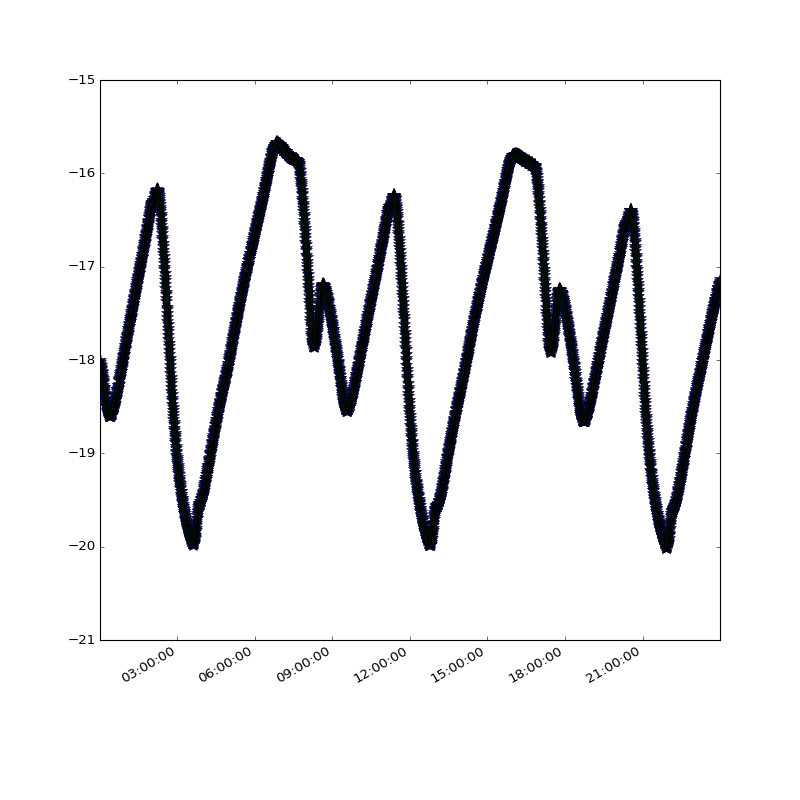

In [12]:
plt.figure()
reindexed.FUV_DET_TEMP_C.dropna().plot(style='*', markersize=12)
reindexed.FUV_DET_TEMP_C.interpolate(method='time').plot(style='*', color='green')

In [13]:
reindexed.FUV_DET_TEMP_C.interpolate(method='time')

2015-01-01 00:00:21.000000000          NaN
2015-01-01 00:00:21.165966331   -18.005027
2015-01-01 00:00:22.000000000   -18.005436
2015-01-01 00:00:23.000000000   -18.005927
2015-01-01 00:00:24.000000000   -18.006417
2015-01-01 00:00:25.000000000   -18.006908
2015-01-01 00:00:26.000000000   -18.007399
2015-01-01 00:00:27.000000000   -18.007889
2015-01-01 00:00:28.000000000   -18.008380
2015-01-01 00:00:29.000000000   -18.008871
2015-01-01 00:00:30.000000000   -18.009361
2015-01-01 00:00:31.000000000   -18.009852
2015-01-01 00:00:32.000000000   -18.010343
2015-01-01 00:00:33.000000000   -18.010833
2015-01-01 00:00:34.000000000   -18.011324
2015-01-01 00:00:35.000000000   -18.011815
2015-01-01 00:00:36.000000000   -18.012305
2015-01-01 00:00:37.000000000   -18.012796
2015-01-01 00:00:38.000000000   -18.013287
2015-01-01 00:00:39.000000000   -18.013777
2015-01-01 00:00:40.000000000   -18.014268
2015-01-01 00:00:41.000000000   -18.014759
2015-01-01 00:00:42.000000000   -18.015249
2015-01-01 

In [14]:
from pathlib import Path
# root = Path('/home/klay6683/to_keep')
root = Path('/Users/klay6683/data/iuvs')
# df = pd.read_hdf('/home/klay6683/to_keep/l1a_dark_scan.h5', 'df')
df = pd.read_hdf(str(root / 'l1a_dark_scan.h5'), 'df')

In [15]:
from iuvs import meta

In [16]:
df = meta.clean_up_dark_scan(df)

In [17]:
df = df[df.COLLECTION_ID!='cruise']
df = df[df.COLLECTION_ID!='transition']
df = df[df.INT_TIME.isin([14400, 4200, 1400])]

In [18]:
pd.__version__

'0.17.0rc1+31.g9be2180'

In [19]:
df.BINNING_SET.head()

TIME_OF_INT
2014-10-18 07:36:19.926570     (0, 1, 319, 11)
2014-10-18 07:36:19.926570     (0, 1, 441, 11)
2014-10-18 07:36:59.675040    (52, 4, 89, 115)
2014-10-18 07:36:59.675040    (2, 34, 96, 115)
2014-10-18 07:55:27.922290    (52, 4, 89, 115)
Name: BINNING_SET, dtype: object

In [44]:
g = df.groupby(['CHANNEL', 'INT_TIME', 'activity', 'BINNING_SET'])

In [46]:
for name, group in g:
    if name == ('FUV', 14400, 'apoapse', (0, 4, 89, 80)):
        mygroup = group

In [47]:
group

,ANC_SVN_REVISION,BIN_PATTERN_INDEX,BIN_TBL,CADENCE,CASE_TEMP,CHANNEL,CODE_SVN_REVISION,COLLECTION_ID,DET_TEMP,DUTY_CYCLE,...,ORBIT_NUMBER,PROCESS,PRODUCT_ID,SOLAR_LONGITUDE,TARGET_NAME,mean,median,std,BINNING_SET,activity
TIME_OF_INT,,,,,,,,,,,,,,,,,,,,,
2015-03-18 08:21:49.885030,1145,LINEAR linear_0011,"LINEAR 13,14 linear_0011",15,4.994077,MUV,1145,disk,-23.3564,0.01,...,900,2015/208 Jul 27 19:23:22.00000UTC,mvn_iuv_l1a_outdisk-orbit00900-muvdark_2015031...,310.216980,MARS,0.283555,0.277863,0.045621,"(140, 8, 96, 115)",outdisk
2015-03-18 08:22:04.885040,1145,LINEAR linear_0011,"LINEAR 13,14 linear_0011",15,4.994077,MUV,1145,disk,-23.3564,0.01,...,900,2015/208 Jul 27 19:23:22.00000UTC,mvn_iuv_l1a_outdisk-orbit00900-muvdark_2015031...,310.216980,MARS,0.278590,0.268579,0.049753,"(140, 8, 96, 115)",outdisk
2015-03-18 08:22:19.885040,1145,LINEAR linear_0011,"LINEAR 13,14 linear_0011",15,4.994077,MUV,1145,disk,-23.3564,0.01,...,900,2015/208 Jul 27 19:23:22.00000UTC,mvn_iuv_l1a_outdisk-orbit00900-muvdark_2015031...,310.216980,MARS,0.295184,0.286997,0.045738,"(140, 8, 96, 115)",outdisk
2015-03-18 08:22:34.885050,1145,LINEAR linear_0011,"LINEAR 13,14 linear_0011",15,4.994077,MUV,1145,disk,-23.3564,0.01,...,900,2015/208 Jul 27 19:23:22.00000UTC,mvn_iuv_l1a_outdisk-orbit00900-muvdark_2015031...,310.216980,MARS,0.278975,0.272278,0.048057,"(140, 8, 96, 115)",outdisk
2015-03-18 08:22:49.885060,1145,LINEAR linear_0011,"LINEAR 13,14 linear_0011",15,4.994077,MUV,1145,disk,-23.3564,0.01,...,900,2015/208 Jul 27 19:23:22.00000UTC,mvn_iuv_l1a_outdisk-orbit00900-muvdark_2015031...,310.216980,MARS,0.287784,0.281335,0.055271,"(140, 8, 96, 115)",outdisk
2015-03-18 08:23:04.885070,1145,LINEAR linear_0011,"LINEAR 13,14 linear_0011",15,4.994077,MUV,1145,disk,-23.5062,0.01,...,900,2015/208 Jul 27 19:23:22.00000UTC,mvn_iuv_l1a_outdisk-orbit00900-muvdark_2015031...,310.216980,MARS,0.294565,0.285864,0.044219,"(140, 8, 96, 115)",outdisk
2015-03-18 08:23:19.885080,1145,LINEAR linear_0011,"LINEAR 13,14 linear_0011",15,4.994077,MUV,1145,disk,-23.3564,0.01,...,900,2015/208 Jul 27 19:23:22.00000UTC,mvn_iuv_l1a_outdisk-orbit00900-muvdark_2015031...,310.216980,MARS,0.295131,0.287601,0.046916,"(140, 8, 96, 115)",outdisk
2015-03-18 08:23:34.885090,1145,LINEAR linear_0011,"LINEAR 13,14 linear_0011",15,4.994077,MUV,1145,disk,-23.3564,0.01,...,900,2015/208 Jul 27 19:23:22.00000UTC,mvn_iuv_l1a_outdisk-orbit00900-muvdark_2015031...,310.216980,MARS,0.274008,0.266918,0.047799,"(140, 8, 96, 115)",outdisk
2015-03-18 08:23:49.885100,1145,LINEAR linear_0011,"LINEAR 13,14 linear_0011",15,4.994077,MUV,1145,disk,-23.3564,0.01,...,900,2015/208 Jul 27 19:23:22.00000UTC,mvn_iuv_l1a_outdisk-orbit00900-muvdark_2015031...,310.216980,MARS,0.278177,0.269938,0.046535,"(140, 8, 96, 115)",outdisk


In [32]:
df[df.CHANNEL=='FUV'].reindex(newind, method='nearest', tolerance='0.5 second').dropna()

,ANC_SVN_REVISION,BIN_PATTERN_INDEX,BIN_TBL,CADENCE,CASE_TEMP,CHANNEL,CODE_SVN_REVISION,COLLECTION_ID,DET_TEMP,DUTY_CYCLE,...,ORBIT_NUMBER,PROCESS,PRODUCT_ID,SOLAR_LONGITUDE,TARGET_NAME,mean,median,std,BINNING_SET,activity
2015-01-01 00:20:04,1141,LINEAR linear_0006,"LINEAR 15,16 linear_0006",15.0,5.044584,FUV,1141,disk,-19.3867,1,...,497,2015/203 Jul 22 20:31:37.00000UTC,mvn_iuv_l1a_apoapse-orbit00497-fuvdark_2015010...,263.506836,MARS,0.373513,0.354177,0.094435,"(0, 4, 89, 80)",apoapse
2015-01-01 00:20:19,1141,LINEAR linear_0006,"LINEAR 15,16 linear_0006",15.0,5.044584,FUV,1141,disk,-19.4616,1,...,497,2015/203 Jul 22 20:31:37.00000UTC,mvn_iuv_l1a_apoapse-orbit00497-fuvdark_2015010...,263.506836,MARS,0.337646,0.319888,0.088610,"(0, 4, 89, 80)",apoapse
2015-01-01 03:13:22,1141,LINEAR linear_0006,"LINEAR 5,6 linear_0006",4.8,4.855359,FUV,1141,limb,-20.4353,1,...,498,2015/203 Jul 22 20:32:16.00000UTC,mvn_iuv_l1a_periapse-orbit00498-fuvdark_201501...,263.582947,MARS,0.571342,0.556428,0.132053,"(0, 4, 89, 115)",periapse
2015-01-01 03:13:27,1141,LINEAR linear_0006,"LINEAR 5,6 linear_0006",4.8,4.855359,FUV,1141,limb,-20.5102,1,...,498,2015/203 Jul 22 20:32:16.00000UTC,mvn_iuv_l1a_periapse-orbit00498-fuvdark_201501...,263.582947,MARS,0.509673,0.494575,0.126925,"(0, 4, 89, 115)",periapse
2015-01-01 03:13:40,1141,LINEAR linear_0006,"LINEAR 5,6 linear_0006",4.8,4.849059,FUV,1141,limb,-20.5102,1,...,498,2015/203 Jul 22 20:32:18.00000UTC,mvn_iuv_l1a_periapse-orbit00498-fuvdark_201501...,263.583069,MARS,0.539798,0.528219,0.131290,"(0, 4, 89, 115)",periapse
2015-01-01 03:13:44,1141,LINEAR linear_0006,"LINEAR 5,6 linear_0006",4.8,4.849059,FUV,1141,limb,-20.4353,1,...,498,2015/203 Jul 22 20:32:18.00000UTC,mvn_iuv_l1a_periapse-orbit00498-fuvdark_201501...,263.583069,MARS,0.496077,0.477236,0.128544,"(0, 4, 89, 115)",periapse
2015-01-01 03:13:49,1141,LINEAR linear_0006,"LINEAR 5,6 linear_0006",4.8,4.849059,FUV,1141,limb,-20.5102,1,...,498,2015/203 Jul 22 20:32:18.00000UTC,mvn_iuv_l1a_periapse-orbit00498-fuvdark_201501...,263.583069,MARS,0.535675,0.518644,0.131181,"(0, 4, 89, 115)",periapse
2015-01-01 03:13:54,1141,LINEAR linear_0006,"LINEAR 5,6 linear_0006",4.8,4.849059,FUV,1141,limb,-20.4353,1,...,498,2015/203 Jul 22 20:32:18.00000UTC,mvn_iuv_l1a_periapse-orbit00498-fuvdark_201501...,263.583069,MARS,0.522510,0.506739,0.125528,"(0, 4, 89, 115)",periapse
2015-01-01 03:13:59,1141,LINEAR linear_0006,"LINEAR 5,6 linear_0006",4.8,4.849059,FUV,1141,limb,-20.3604,1,...,498,2015/203 Jul 22 20:32:18.00000UTC,mvn_iuv_l1a_periapse-orbit00498-fuvdark_201501...,263.583069,MARS,0.476635,0.459379,0.125628,"(0, 4, 89, 115)",periapse
2015-01-01 03:14:04,1141,LINEAR linear_0006,"LINEAR 5,6 linear_0006",4.8,4.849059,FUV,1141,limb,-20.4353,1,...,498,2015/203 Jul 22 20:32:18.00000UTC,mvn_iuv_l1a_periapse-orbit00498-fuvdark_201501...,263.583069,MARS,0.524106,0.501822,0.132672,"(0, 4, 89, 115)",periapse
